In [109]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


In [110]:
df = pd.read_csv('/Users/morganabbitt/galvanize/capstone/NFL-Analytics/data/NFL Play by Play 2009-2018 (v5).csv', low_memory=False)
df = df[df['quarter_end'] == 0]
# df = df[['play_id', 'game_id', 'home_team', 'away_team', 'posteam', 'posteam_type', 'defteam', 'side_of_field', 'yardline_100',
#         'game_date', 'game_seconds_remaining', 'drive', 'sp', 'qtr', 'down', 'goal_to_go', 'time', 'yrdln', 'ydstogo', 
#         'total_home_score', 'total_away_score', 'posteam_score', 'defteam_score', 'ep', 'epa', 'wp', 'play_type', 
#         'third_down_converted', 'third_down_failed', 'fourth_down_converted', 'fourth_down_failed', 'penalty', 'touchdown',
#         'quarter_end', 'field_goal_result', 'kick_distance']]

In [111]:
df_4 = df[df['down'] == 4.0]

In [112]:
df_4

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,home_wp_post,away_wp_post,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,receiver_player_id,receiver_player_name,rusher_player_id,rusher_player_name,lateral_receiver_player_id,lateral_receiver_player_name,lateral_rusher_player_id,lateral_rusher_player_name,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,assist_tackle_2_team,assist_tackle_3_player_id,assist_tackle_3_player_name,assist_tackle_3_team,assist_tackle_4_player_id,assist_tackle_4_player_name,assist_tackl

In [113]:
#percent of plays that are not punts 
#40% 
df_4[df_4['play_type'] != 'punt'].shape[0] / (df_4[df_4['play_type'] == 'punt'].shape[0] + df_4[df_4['play_type'] != 'punt'].shape[0])

0.39683180304711935

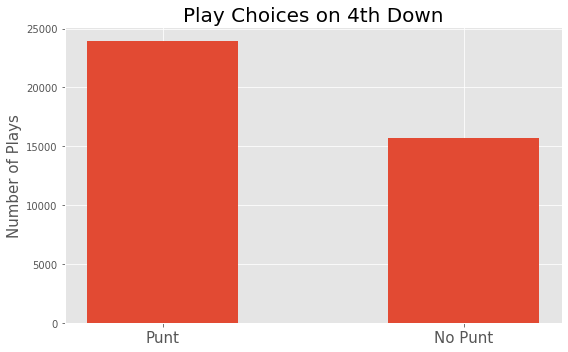

In [114]:
plt.figure(figsize=(8,5))
plt.title('Play Choices on 4th Down', size=20)
plt.ylabel('Number of Plays', size=15)
plt.xticks(size=15)
plt.bar(['Punt', 'No Punt'], [df_4[df_4['play_type'] == 'punt'].shape[0] , df_4[df_4['play_type'] != 'punt'].shape[0]], width=0.5)
plt.tight_layout()

In [115]:
df_4[df_4['play_type'] == 'punt']['quarter_seconds_remaining']

4         807.0
8         694.0
14        505.0
24        302.0
41        793.0
          ...  
449275    140.0
449296    763.0
449301    702.0
449310    463.0
449341    536.0
Name: quarter_seconds_remaining, Length: 23912, dtype: float64

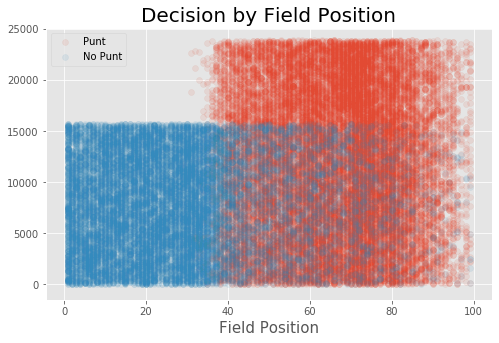

In [116]:
plt.figure(figsize=(8,5))
plt.title('Decision by Field Position', size=20)
plt.xlabel('Field Position', size=15)
plt.scatter(y=np.arange(len(df_4[df_4['play_type'] == 'punt']['yardline_100'].values)), x=df_4[df_4['play_type'] == 'punt']['yardline_100'].values, alpha=0.1, label='Punt')
plt.scatter(y=np.arange(len(df_4[df_4['play_type'] != 'punt']['yardline_100'].values)), x=df_4[df_4['play_type'] != 'punt']['yardline_100'].values, alpha=0.1, label='No Punt')
plt.legend()

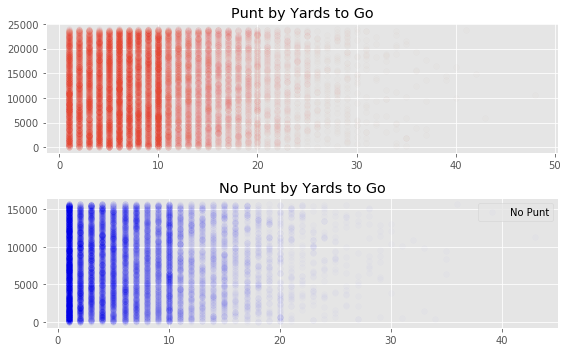

In [117]:
fig, ax = plt.subplots(2, 1, figsize=(8,5))
ax[0].set_title('Punt by Yards to Go')
ax[0].scatter(y=np.arange(len(df_4[df_4['play_type'] == 'punt']['ydstogo'].values)), x=df_4[df_4['play_type'] == 'punt']['ydstogo'].values, alpha=0.01, label='Punt')
ax[1].set_title('No Punt by Yards to Go')
ax[1].scatter(y=np.arange(len(df_4[df_4['play_type'] != 'punt']['ydstogo'].values)), x=df_4[df_4['play_type'] != 'punt']['ydstogo'].values, alpha=0.01, label='No Punt', c='b')
plt.legend()
plt.tight_layout()

In [118]:
punt = df_4[df_4['play_type'] == 'punt'].groupby('ydstogo').count().iloc[:10, 1]

In [119]:
not_punt = df_4[df_4['play_type'] != 'punt'].groupby('ydstogo').count().iloc[:10, 1]

In [120]:
#finds percent of total plays for first 10 yards
pct_not_punt = []
for x in not_punt:
    pct_not_punt.append(x / sum(not_punt))
    
    pct_punt = []
for x in punt:
    pct_punt.append(x / sum(punt))

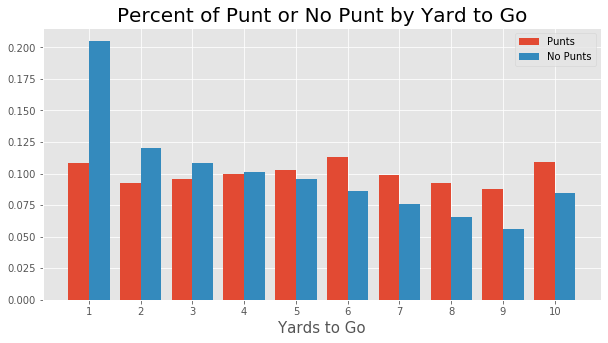

In [121]:
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(np.arange(10)-0.2, pct_punt, width=0.4, label='Punts')
#plt.xticks([1, 2, 3, 4, 5,6 ,7, 8, 9, 10])
plt.title('Percent of Punt or No Punt by Yard to Go', size=20)
plt.xticks(ticks = np.arange(10), labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.xlabel('Yards to Go', size=15)
plt.bar(np.arange(10)+0.2, pct_not_punt, width=0.4, label='No Punts')
plt.legend()

In [122]:
half_50_punt = df_4[df_4['play_type'] == 'punt'].groupby('game_seconds_remaining').count().head(60)['play_id'].values

In [123]:
half_50_nopunt = df_4[df_4['play_type'] != 'punt'].groupby('game_seconds_remaining').count().head(60)['play_id'].values

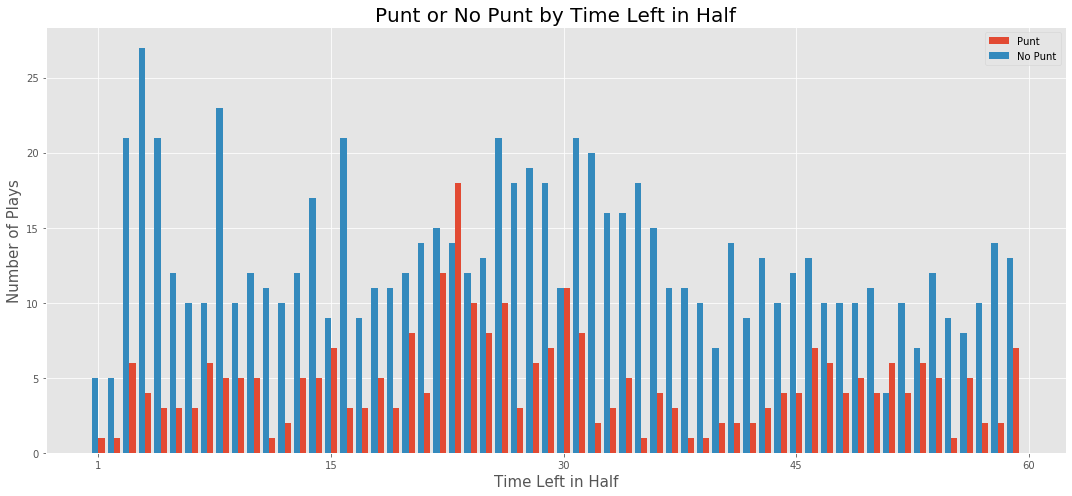

In [124]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Punt or No Punt by Time Left in Half', size=20)
plt.bar(np.arange(60)+0.2, half_50_punt, label='Punt', width=0.4)
plt.bar(np.arange(60)-0.2, half_50_nopunt, label='No Punt', width=0.4)
plt.xticks(ticks=np.arange(0, 61, 15), labels=[1, 15, 30, 45, 60])
plt.xlabel('Time Left in Half', size=15)
plt.ylabel('Number of Plays', size=15)
plt.legend()
plt.tight_layout()